## Indentification of all the members of the group.
Name: André Ferrari Moukarzel - 9298166

Name: Ângelo Gregório Lovatto - 9293435

## Name of the dataset
Dataset: Drug consumption

## Motivation to choose this dataset
Rational for choosing this dataset: Having the personality measurements of a large number of people (knowing other characteristics, like gender, age, etc..) opens up interesting possiblities for analysis, even more with the combined data of drug consumption.
 Not only that, the dataset consists of real-valued attributes which makes it easier to plot histograms and analyze features such as mean, standard deviation and the like. However, it's not clear if these analyses have any meaning in the context of the attributes considered.

## Abstract
The dataset consists of the results of a survey of 1885 participants with correspondent personal characteristics (age, ethnicity, level of education..) relating personality data to drug consumption.  18 legal and illegal and a fictional drug were considered, with the possible answers indicating how heavy of a consumer the respondent is.

## Questions to the dataset
Question 1: Is there a difference in distribution of any personality trait between sexes?

Question 2: Is a personality profile indicative that someone is an over-claimer (someone who affirmed using a fictional drug)? 

Question 3: Which are the most common drugs per country surveyed?


## EDA
Present your EDA strategy: 

Analyse the distribution of personality traits with gender separation.

Distinguish over-claimers from others.

Plot personality traits with specific drug use.

Which personality traits that seem to have a bigger correlation with drug use, analyse population in highest and lowest quartile of distribution of such trait. 

In [140]:
%matplotlib inline 
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
import numpy as np

drugs = pd.read_csv('drug_consumption.data')
drugs.describe()

,id,age,gender,education,country,etnicity,nscore,escore,oscore,ascore,cscore,impulsive,ss
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


## Question 1

Male, in blue:    -0.48246

Female, in orange: 0.48246

By plotting the distribution of the traits while distinguishing by gender, we can notice some interesting differences in some of the traits.

### Neuroticism

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.074399,1.008479,-3.46436,-0.79151,-0.05188,0.62967,2.61139
0.48246,942.0,0.074571,0.982509,-2.75696,-0.58016,0.04257,0.73545,3.27393


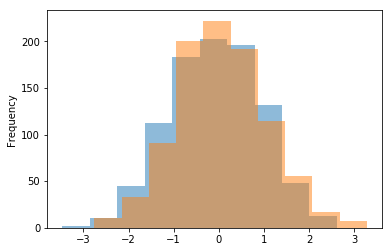

In [141]:
drugs.groupby('gender')['nscore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['nscore'].describe()

### Extraversion

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.057834,1.037565,-3.27393,-0.80615,-0.15487,0.63779,3.27393
0.48246,942.0,0.057569,0.952663,-2.72827,-0.57545,0.00332,0.63779,3.00537


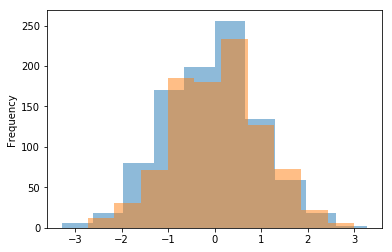

In [142]:
drugs.groupby('gender')['escore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['escore'].describe()

### Openess

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,0.129889,0.953495,-2.85950,-0.45174,0.14143,0.72330,2.90161
0.48246,942.0,-0.131096,1.021187,-3.27393,-0.84732,-0.17779,0.58331,2.90161


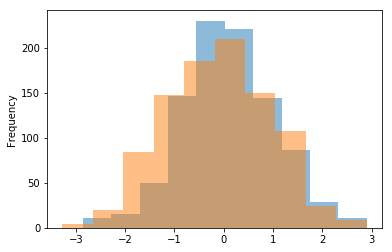

In [143]:
drugs.groupby('gender')['oscore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['oscore'].describe()

### Agreeableness

It is of note that the median of the distribution is half a standard deviation higher among the females. That is a relevant difference in psychology, and is also the biggest difference among the "Big Five" NEO-FFI-R personality traits measurements.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.219251,0.970008,-3.46436,-0.91699,-0.30172,0.43852,3.46436
0.48246,942.0,0.218994,0.976623,-2.78793,-0.45321,0.28783,0.94156,3.15735


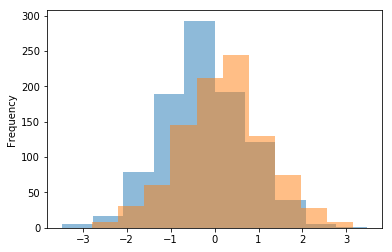

In [144]:
drugs.groupby('gender')['ascore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['ascore'].describe()

### Conscientiousness 

While the median is similar, it is noticeable that the male distribution tends to be 0.3 standard deviations lower than the female's. That is a relevant difference, given that low conscientiousness has been correlated to drug abuse in other studies.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,-0.183616,0.975850,-3.46436,-0.78155,-0.27607,0.415940,3.00537
0.48246,942.0,0.183038,0.985697,-3.15735,-0.52745,0.25953,0.894192,3.46436


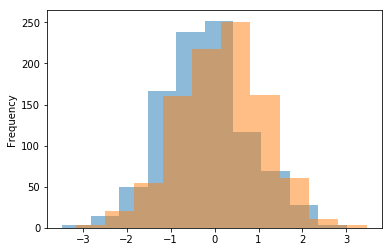

In [145]:
drugs.groupby('gender')['cscore'].plot.hist(alpha=0.5)
drugs.groupby('gender')['cscore'].describe()

### Impulsiveness

A trait that is considered a contributor to conscientiousness in NEO-FFI-R scaling, and is inversely correlated to such. Here, the difference between males and females is accentuated, with males being 0.4 standard deviations more impulsive, on average.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,0.166949,0.908093,-2.55524,-0.21712,0.19268,0.88113,2.90161
0.48246,942.0,-0.152686,0.973218,-2.55524,-0.71126,-0.21712,0.52975,2.90161


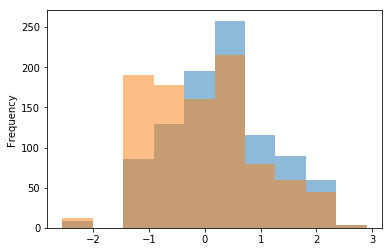

In [146]:
drugs.groupby('gender')['impulsive'].plot.hist(alpha=0.5)
drugs.groupby('gender')['impulsive'].describe()

### Impulsiveness

Another trait that is considered a contributor to conscientiousness in NEO-FFI-R scaling, and is inversely correlated to such. This is the trait with the most noticeable difference between males and females, with females being, on average, half a standard deviation less impulsive and having a mean lower by a whole standard deviation.

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
-0.48246,943.0,0.231931,0.881860,-2.07848,-0.21575,0.40148,0.76540,1.92173
0.48246,942.0,-0.238764,0.984864,-2.07848,-0.84637,-0.21575,0.40148,1.92173


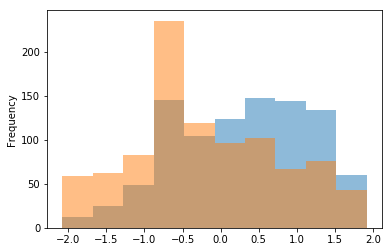

In [147]:
drugs.groupby('gender')['ss'].plot.hist(alpha=0.5)
drugs.groupby('gender')['ss'].describe()

## Question 2

False    1877
True        8
Name: overclaimer, dtype: int64

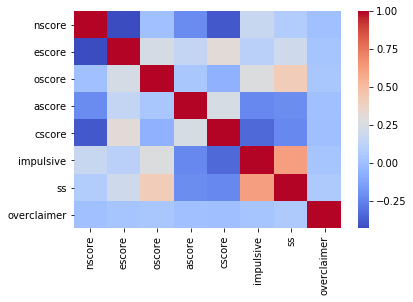

In [148]:
drugs['overclaimer'] = drugs['semer'] != 'CL0'
sns.heatmap(drugs[['nscore','escore','oscore','ascore','cscore', 'impulsive', 'ss','overclaimer']].corr(), cmap='coolwarm')
drugs['overclaimer'].value_counts()

Not only do all personality traits have no aparent correlation to what we called over-claimers (that is, people that told researchers they had ever used "Semer", a fictional drug), the number of over-claimers itself is so small that it would be impossible to gather statisticaly relevant data from it.

## Question 3

USA: -0.57009

New Zealand: -0.46841

Other: -0.28519

Australia: -0.09765

Republic of Ireland: 0.21128

Canada: 0.24923

UK: 0.96082

In [149]:
drugs['alcohool'] = (drugs['alcohool'] != 'CL0') & (drugs['alcohool'] != 'CL1')
drugs['amphet'] = (drugs['amphet'] != 'CL0') & (drugs['amphet'] != 'CL1')
drugs['amyl'] = (drugs['amyl'] != 'CL0') & (drugs['amyl'] != 'CL1')
drugs['benzos'] = (drugs['benzos'] != 'CL0') & (drugs['benzos'] != 'CL1')
drugs['caff'] = (drugs['caff'] != 'CL0') & (drugs['caff'] != 'CL1')
drugs['cannabis'] = (drugs['cannabis'] != 'CL0') & (drugs['cannabis'] != 'CL1')
drugs['choc'] = (drugs['choc'] != 'CL0') & (drugs['choc'] != 'CL1')
drugs['coke'] = (drugs['coke'] != 'CL0') & (drugs['coke'] != 'CL1')
drugs['crack'] = (drugs['crack'] != 'CL0') & (drugs['crack'] != 'CL1')
drugs['ecstasy'] = (drugs['ecstasy'] != 'CL0') & (drugs['ecstasy'] != 'CL1')
drugs['heroin'] = (drugs['heroin'] != 'CL0') & (drugs['heroin'] != 'CL1')
drugs['ketamine'] = (drugs['ketamine'] != 'CL0') & (drugs['ketamine'] != 'CL1')
drugs['legalh'] = (drugs['legalh'] != 'CL0') & (drugs['legalh'] != 'CL1')
drugs['lsd'] = (drugs['lsd'] != 'CL0') & (drugs['lsd'] != 'CL1')
drugs['meth'] = (drugs['meth'] != 'CL0') & (drugs['meth'] != 'CL1')
drugs['mushrooms'] = (drugs['mushrooms'] != 'CL0') & (drugs['mushrooms'] != 'CL1')
drugs['nicotine'] = (drugs['nicotine'] != 'CL0') & (drugs['nicotine'] != 'CL1')
drugs['vsa'] = (drugs['vsa'] != 'CL0') & (drugs['vsa'] != 'CL1')

In [150]:
def lowest_to_highest(count_list):
    print("From lowest to highest:\n\n")
    names = ['USA', 'New Zealand', 'Other', 'Australia', 'Republic of Ireland', 'Canada', 'UK']
    vals = [557, 5, 118, 54, 20, 87, 1044]
      
    for i, key in enumerate(count_list.keys()):
        if key[1]: # Number of "True"
            if key[0] <= -0.57: # USA
                vals[0] = count_list[i]/vals[0]
            elif key[0] <= -0.46: # NZ
                vals[1] = count_list[i]/vals[1]
            elif key[0] <= -0.28: # Other
                vals[2] = count_list[i]/vals[2]
            elif key[0] <= -0.09: # AUS
                vals[3] = count_list[i]/vals[3]
            elif key[0] <= 0.22: # IE
                vals[4] = count_list[i]/vals[4]
            elif key[0] <= 0.25: # CAN
                vals[5] = count_list[i]/vals[5]
            else:
                vals[6] = count_list[i]/vals[6]
    
    vals, names = zip(*sorted(zip(vals, names)))
    for i in range(len(vals)):
        print(names[i], ": ",vals[i])

### Alcohol

In [151]:
val = drugs.groupby('country')['alcohool'].value_counts()
lowest_to_highest(val)

From lowest to highest:


Republic of Ireland :  0.9
Canada :  0.9195402298850575
UK :  0.9597701149425287
Other :  0.9745762711864406
USA :  0.9766606822262118
Australia :  0.9814814814814815
New Zealand :  1.0


### Amphetamines 

In [152]:
val = drugs.groupby('country')['amphet'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.2049808429118774
New Zealand :  0.4
Other :  0.4067796610169492
Canada :  0.4367816091954023
USA :  0.5888689407540395
Republic of Ireland :  0.6
Australia :  0.6851851851851852


### Amyl Nitrite

In [153]:
val = drugs.groupby('country')['amyl'].value_counts(sort=False)
lowest_to_highest(val)

From lowest to highest:


USA :  0.12387791741472172
Canada :  0.12643678160919541
UK :  0.21743295019157088
Other :  0.2627118644067797
Australia :  0.37037037037037035
Republic of Ireland :  0.45
New Zealand :  0.6


### Benzodiazepine

In [154]:
val = drugs.groupby('country')['benzos'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.24616858237547892
Other :  0.423728813559322
Canada :  0.42528735632183906
Republic of Ireland :  0.5
New Zealand :  0.6
Australia :  0.6296296296296297
USA :  0.6786355475763016


### Caffeine

In [155]:
val = drugs.groupby('country')['caff'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.9703065134099617
Australia :  0.9814814814814815
USA :  0.9910233393177738
Canada :  1.0
New Zealand :  1.0
Other :  1.0
Republic of Ireland :  1.0


### Cannabis

In [156]:
val = drugs.groupby('country')['cannabis'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.47988505747126436
Canada :  0.7701149425287356
Republic of Ireland :  0.8
Other :  0.847457627118644
Australia :  0.9074074074074074
USA :  0.9461400359066428
New Zealand :  1.0


### Chocolate

In [157]:
val = drugs.groupby('country')['choc'].value_counts()
lowest_to_highest(val)

From lowest to highest:


Canada :  0.9425287356321839
USA :  0.9712746858168761
UK :  0.9875478927203065
Other :  0.9915254237288136
Australia :  1.0
New Zealand :  1.0
Republic of Ireland :  1.0


### Cocaine

In [158]:
val = drugs.groupby('country')['coke'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.25
Other :  0.3983050847457627
New Zealand :  0.4
Republic of Ireland :  0.45
Canada :  0.45977011494252873
Australia :  0.46296296296296297
USA :  0.5439856373429084


### Crack

In [160]:
val = drugs.groupby('country')['crack'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.04310344827586207
Other :  0.0847457627118644
Australia :  0.09259259259259259
Republic of Ireland :  0.1
Canada :  0.19540229885057472
USA :  0.20107719928186715
New Zealand :  5


### Ecstasy

In [161]:
val = drugs.groupby('country')['ecstasy'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.2509578544061303
Canada :  0.47126436781609193
Other :  0.5
New Zealand :  0.6
Republic of Ireland :  0.6
USA :  0.6068222621184919
Australia :  0.6666666666666666


### Heroin

In [162]:
val = drugs.groupby('country')['heroin'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.032567049808429116
Other :  0.09322033898305085
Republic of Ireland :  0.1
Australia :  0.1111111111111111
Canada :  0.13793103448275862
USA :  0.26032315978456017
New Zealand :  0.4


### Ketamines

In [163]:
val = drugs.groupby('country')['ketamine'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.1417624521072797
Republic of Ireland :  0.15
USA :  0.22980251346499103
Other :  0.2457627118644068
Canada :  0.27586206896551724
Australia :  0.2962962962962963
New Zealand :  0.4


### Legal Highs

In [164]:
val = drugs.groupby('country')['legalh'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.22126436781609196
Canada :  0.4482758620689655
Other :  0.4915254237288136
Australia :  0.5185185185185185
Republic of Ireland :  0.6
USA :  0.6983842010771992
New Zealand :  1.0


### LSD

In [165]:
val = drugs.groupby('country')['lsd'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.10440613026819924
Republic of Ireland :  0.3
Canada :  0.3563218390804598
Other :  0.5084745762711864
USA :  0.5601436265709157
Australia :  0.6481481481481481
New Zealand :  0.8


### Methadone

In [166]:
val = drugs.groupby('country')['meth'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.06704980842911877
Republic of Ireland :  0.2
Other :  0.211864406779661
Australia :  0.2222222222222222
Canada :  0.27586206896551724
New Zealand :  0.4
USA :  0.5026929982046678


### Mushrooms

In [167]:
val = drugs.groupby('country')['mushrooms'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.17049808429118773
Republic of Ireland :  0.3
Australia :  0.5
Canada :  0.5287356321839081
Other :  0.5508474576271186
New Zealand :  0.6
USA :  0.6624775583482945


### Nicotine

In [168]:
val = drugs.groupby('country')['nicotine'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.5574712643678161
New Zealand :  0.6
Canada :  0.6896551724137931
Australia :  0.7777777777777778
Other :  0.8050847457627118
USA :  0.8330341113105925
Republic of Ireland :  0.9


### Volatile Substance Abuse

In [169]:
val = drugs.groupby('country')['vsa'].value_counts()
lowest_to_highest(val)

From lowest to highest:


UK :  0.04310344827586207
Canada :  0.08045977011494253
Other :  0.1271186440677966
Australia :  0.2222222222222222
Republic of Ireland :  0.25
USA :  0.2585278276481149
New Zealand :  0.4


## Considerations

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

6) Is there any symmetry that can be stressed?

7) How important was EDA to help you understand the dataset?